This script generates the allele frequency spectra in the main text and in the supplementary. It also generates statistics for the proportion of mutations that are driver etc etc.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_style("white")
sns.despine()
# sns.set_context('talk')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)



Populating the interactive namespace from numpy and matplotlib


In [2]:
# RED =  sns.xkcd_rgb["pale red"]
# GREEN = sns.xkcd_rgb["medium green"]
# BLUE = sns.xkcd_rgb["denim blue"]


def neighbour_iterator(arr):
    index = 0
    while index < len(arr)-1:
        yield (arr[index], arr[index+1])
        index += 1

numbins = 100
binrange = np.linspace(0,1,num=numbins)

In [3]:
# _, GREEN, RED, _, _, BLUE = sns.color_palette('colorblind')
RED, BLUE, GREEN = sns.xkcd_palette(["amber", "dusty purple", "faded green"])
# RED, BLUE, GREEN = sns.color_palette("cubehelix", 3)
sns.set_context('paper', font_scale=1.5)


def freq_plot(ax, mappings):
    for mapping, color, model_name in zip(mappings, [RED, GREEN, BLUE], ['No Turnover', 'Surface Turnover', 'Turnover']):

        replicates = glob(mapping)

        all_xs = []
        all_muts = []
        all_drvs = []

        for replicate_folder in replicates:
            try:
                datafile = glob(replicate_folder+'/all_PMs*.dat')[0]
                muts = pd.read_csv(datafile, sep=' ', names=['Num', 'SNP', 'abundancy'])
                datafile = glob(replicate_folder+'/drv_PMs_*.dat')[0]

                drvs = pd.read_csv(datafile, sep=' ', names=['Num', 'SNP', 'abundancy'])


                y,x = np.histogram(muts.abundancy, bins=binrange)
                x_meaned = np.mean(np.array(list(neighbour_iterator(x))), axis=1)
                all_muts.append(y)        
                all_xs.append(x_meaned)

                y,x = np.histogram(drvs.abundancy, bins=binrange)
                all_drvs.append(y)
            except Exception as e:
                print 'Could not find file:'+str(replicate_folder)+' '+str(e)

        y = np.mean(np.array(all_muts), axis=0)
        y2 = np.mean(np.array(all_drvs), axis=0)

        x_meaned = np.mean(np.array(all_xs), axis=0)

        y_keep = y!=0
        y2_keep = y2!=0

        y1_x_plt = np.log10(x_meaned[y_keep])
        y1_plt = np.log10(y[y_keep]).astype(np.float)

        y2_x_plt = np.log10(x_meaned[y2_keep])
        y2_plt = np.log10(y2[y2_keep]).astype(np.float)


        print model_name+':'
        f_sum = np.around(np.sum(y),decimals=2)
        d_sum = np.around(np.sum(y2),decimals=2)
        print 'FREQ_SUM:'+str(f_sum)
        print 'DRV_SUM:'+str(d_sum)
        print 'PROP DRV:'+str(d_sum/f_sum)

        ax.plot(y1_x_plt,y1_plt,'o',color=color, alpha=1, label=str(model_name +' $S$='+str(f_sum)))
        ax.plot(y2_x_plt,y2_plt, '^', color=color, alpha=0.8, label=str(model_name+' (Drivers) $S_d$=' + str(d_sum)), markersize=10)



No Turnover:
FREQ_SUM:6961.9
DRV_SUM:10.7
PROP DRV:0.00153693675577
Surface Turnover:
FREQ_SUM:6974.1
DRV_SUM:8.5
PROP DRV:0.00121879525674
Turnover:
FREQ_SUM:7294.4
DRV_SUM:11.1
PROP DRV:0.00152171528844
No Turnover:
FREQ_SUM:6961.9
DRV_SUM:10.7
PROP DRV:0.00153693675577
Surface Turnover:
FREQ_SUM:12683.5
DRV_SUM:50.3
PROP DRV:0.00396578231561
Could not find file:/Volumes/Stockage/u0.03simulations/1_0_065_outs_101 list index out of range
Could not find file:/Volumes/Stockage/u0.03simulations/1_0_065_outs_2 list index out of range
Turnover:
FREQ_SUM:40919.38
DRV_SUM:2591.5
PROP DRV:0.063331849114


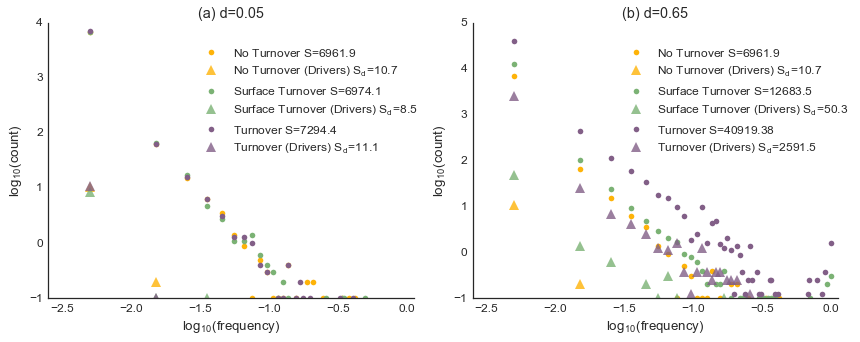

In [4]:

death_rate = '005'
root_folder = '/Volumes/Stockage/u0.03simulations/'
mappings = [ root_folder+'1_0_0_*',
            root_folder+'1_1_'+death_rate+'_*',
           root_folder+'1_0_'+death_rate+'_*']


# f = plt.figure(figsize=(6,9))
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)

freq_plot(ax, mappings)
# plt.title('Frequency Spectra',fontsize=12)
ax.set_xlabel('$log_{10}(frequency)$')
ax.set_ylabel('$log_{10}(count)$')
ax.set_xlim([-2.6, 0.05])
ax.legend(fontsize=12,loc=(0.4,0.5))
sns.despine()
ax.set_title('(a) d=0.'+death_rate[1:])
# ax.savefig('./freqspec'+death_rate+'.pdf')

death_rate = '065'
root_folder = '/Volumes/Stockage/u0.03simulations/'
mappings = [ root_folder+'1_0_0_*',
            root_folder+'1_1_'+death_rate+'_*',
           root_folder+'1_0_'+death_rate+'_*']

ax = f.add_subplot(122)
freq_plot(ax, mappings)
ax.set_xlabel('$log_{10}(frequency)$')
ax.set_ylabel('$log_{10}(count)$')
ax.set_xlim([-2.6, 0.05])
ax.legend(fontsize=12,loc=(0.4,0.5))
sns.despine()
ax.set_title('(b) d=0.'+death_rate[1:])
plt.tight_layout(h_pad=1)
plt.savefig('./freqspec003.pdf')

No Turnover:
FREQ_SUM:6961.9
DRV_SUM:10.7
PROP DRV:0.00153693675577
Surface Turnover:
FREQ_SUM:7059.4
DRV_SUM:11.0
PROP DRV:0.00155820607984
Turnover:
FREQ_SUM:7631.5
DRV_SUM:11.1
PROP DRV:0.00145449780515
No Turnover:
FREQ_SUM:6961.9
DRV_SUM:10.7
PROP DRV:0.00153693675577
Surface Turnover:
FREQ_SUM:7242.6
DRV_SUM:9.1
PROP DRV:0.00125645486428
Turnover:
FREQ_SUM:8281.5
DRV_SUM:12.9
PROP DRV:0.00155768882449


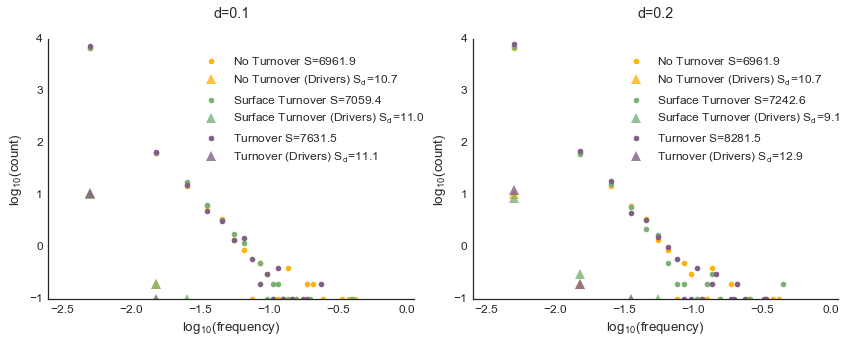

In [6]:

death_rate = '01'
root_folder = '/Volumes/Stockage/u0.03simulations/'
mappings = [ root_folder+'1_0_0_*',
            root_folder+'1_1_'+death_rate+'_*',
           root_folder+'1_0_'+death_rate+'_*']


f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)

freq_plot(ax, mappings)
# plt.title('Frequency Spectra',fontsize=12)
ax.set_xlabel('$log_{10}(frequency)$')
ax.set_ylabel('$log_{10}(count)$')
ax.set_xlim([-2.6, 0.05])
ax.legend(fontsize=12,loc=(0.4,0.5))
sns.despine()
ax.set_title('d=0.'+death_rate[1:]+'\n')
# ax.set_title('d=0')
# ax.savefig('./freqspec'+death_rate+'.pdf')

death_rate = '02'
root_folder = '/Volumes/Stockage/u0.03simulations/'
mappings = [ root_folder+'1_0_0_*',
            root_folder+'1_1_'+death_rate+'_*',
           root_folder+'1_0_'+death_rate+'_*']

ax = f.add_subplot(122)
freq_plot(ax, mappings)
ax.set_xlabel('$log_{10}(frequency)$')
ax.set_ylabel('$log_{10}(count)$')
ax.set_xlim([-2.6, 0.05])
ax.legend(fontsize=12,loc=(0.4,0.5))
sns.despine()
ax.set_title('d=0.'+death_rate[1:]+'\n')
plt.tight_layout(h_pad=1)
# plt.suptitle('Allele')
plt.savefig('./AFS-d003.pdf')